In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\abi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\abi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("C:\\Users\\abi\\Desktop\\ODI_Match_info.csv")

In [5]:
df.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel


In [6]:
df.drop(['id', 'season', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue','dl_applied' , 'umpire1', 'umpire2', 'umpire3'],
        axis = 1, inplace = True )

In [7]:
df.head()

,city,date,team1,team2,toss_winner,toss_decision,result,winner
0,Indore,2023/09/24,India,Australia,Australia,field,D/L,India
1,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,England
2,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,New Zealand
3,Chandigarh,2023/09/22,Australia,India,India,field,normal,India
4,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           2069 non-null   object
 1   date           2379 non-null   object
 2   team1          2379 non-null   object
 3   team2          2379 non-null   object
 4   toss_winner    2379 non-null   object
 5   toss_decision  2379 non-null   object
 6   result         2379 non-null   object
 7   winner         2259 non-null   object
dtypes: object(8)
memory usage: 148.8+ KB


In [9]:
df.shape

(2379, 8)

In [10]:
city_df = pd.read_csv('https://datahub.io/core/world-cities/r/world-cities.csv')

In [11]:
city_df.rename(columns ={"name":"city"}, inplace=True)

In [12]:
city_df.head(2)

,city,country,subcountry,geonameid
0,les Escaldes,Andorra,Escaldes-Engordany,3040051
1,Andorra la Vella,Andorra,Andorra la Vella,3041563


In [13]:
df = df.merge(city_df, how = 'left', on = 'city')

In [14]:
df.head()

,city,date,team1,team2,toss_winner,toss_decision,result,winner,country,subcountry,geonameid
0,Indore,2023/09/24,India,Australia,Australia,field,D/L,India,India,Madhya Pradesh,1269743.0
1,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,England,United Kingdom,England,2641170.0
2,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,New Zealand,Bangladesh,Dhaka,1185241.0
3,Chandigarh,2023/09/22,Australia,India,India,field,normal,India,India,Chandigarh,1274746.0
4,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,NaN,Bangladesh,Dhaka,1185241.0


In [15]:
df.drop(['subcountry', 'geonameid'], inplace =True, axis = 1)

In [16]:
df.head(2)

,city,date,team1,team2,toss_winner,toss_decision,result,winner,country
0,Indore,2023/09/24,India,Australia,Australia,field,D/L,India,India
1,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,England,United Kingdom


In [17]:
df.rename(columns = {'country' : 'played_in'}, inplace = True)

In [18]:
df.played_in.unique()

array(['India', 'United Kingdom', 'Bangladesh', 'Brazil', 'Sri Lanka',
       'South Africa', 'Canada', 'Pakistan', nan, 'Barbados', 'Zimbabwe',
       'United Arab Emirates', 'United States', 'Nepal', 'Namibia',
       'Bermuda', 'New Zealand', 'Australia', 'Papua New Guinea',
       'Netherlands', 'Trinidad and Tobago', 'Ireland', 'Qatar',
       'Jamaica', 'Norfolk Island', 'Malaysia', 'Bolivia', 'Cuba',
       'Uruguay', 'Hong Kong', 'Japan', 'Argentina', 'Kenya',
       'Saint Vincent and the Grenadines'], dtype=object)

In [19]:
df.head(2)

,city,date,team1,team2,toss_winner,toss_decision,result,winner,played_in
0,Indore,2023/09/24,India,Australia,Australia,field,D/L,India,India
1,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,England,United Kingdom


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           2897 non-null   object
 1   date           3207 non-null   object
 2   team1          3207 non-null   object
 3   team2          3207 non-null   object
 4   toss_winner    3207 non-null   object
 5   toss_decision  3207 non-null   object
 6   result         3207 non-null   object
 7   winner         3027 non-null   object
 8   played_in      2516 non-null   object
dtypes: object(9)
memory usage: 225.6+ KB


In [21]:
df['played_in'].isnull().sum()

691

In [171]:
temp_df = df[df['played_in'].isnull()]

In [172]:
temp_df.head()

,city,date,team1,team2,toss_winner,toss_decision,result,winner,played_in


In [173]:
temp_df.city.unique()

array([], dtype=object)

In [174]:
temp_df.index

Index([], dtype='int64')

In [175]:
temp_df.isnull().sum()

city             0
date             0
team1            0
team2            0
toss_winner      0
toss_decision    0
result           0
winner           0
played_in        0
dtype: int64

In [176]:
city_json ={
'Multan': 'Pakistan',
'Hambantota': 'Sri Lanka',
'Tarouba': 'Trinidad and Tobago',
'Chattogram': 'Bangladesh',
'Edinburgh': 'Scotland',
'Glasgow': 'Scotland',
'Pearland' : 'United States',
'Mount Maunganui': 'New Zealand',
'Al Amarat': 'Oman',
'Mirpur': 'Pakistan',
'North Sound': 'Barbados',
'Rajkot': 'India',
"St George's": 'South Africa',
'Bready': 'United Kingdom',
'Dehra Dun': 'India',
'Gros Islet': 'Trinidad and Tobago',
'St Kitts': 'Trinidad and Tobago',
'Guyana': 'Guyana',
'Dharamsala': 'India',
'Antigua': 'Trinidad and Tobago',
'Barbados': 'Barbados',
'St Lucia': 'Trinidad and Tobago',
'Dharmasala' : 'India',
'Grenada': 'Trinidad and Tobago',
'Fatullah': 'Bangladesh',
'Bangalore': 'India',
'King City': 'Canada',
'St Vincent': 'Trinidad and Tobago',
'Dominica': 'Trinidad and Tobago',
'Faisalabad': 'Pakistan',
'Sind': 'Pakistan',
'Margao': 'India',
'Faridabad': 'India',
'Gqeberha': 'South Africa'
}

In [177]:
city_json.keys()

dict_keys(['Multan', 'Hambantota', 'Tarouba', 'Chattogram', 'Edinburgh', 'Glasgow', 'Pearland', 'Mount Maunganui', 'Al Amarat', 'Mirpur', 'North Sound', 'Rajkot', "St George's", 'Bready', 'Dehra Dun', 'Gros Islet', 'St Kitts', 'Guyana', 'Dharamsala', 'Antigua', 'Barbados', 'St Lucia', 'Dharmasala', 'Grenada', 'Fatullah', 'Bangalore', 'King City', 'St Vincent', 'Dominica', 'Faisalabad', 'Sind', 'Margao', 'Faridabad', 'Gqeberha'])

In [178]:
def city_fixer(df_row):
    
    if df_row.city in list(city_json.keys()):
        df_row.played_in = city_json[df_row.city]
    return df_row

In [179]:
temp_df.shape

(0, 9)

In [180]:
new_city = temp_df.apply(city_fixer, axis = 1)

In [181]:
new_city.isnull().sum()

city             0
date             0
team1            0
team2            0
toss_winner      0
toss_decision    0
result           0
winner           0
played_in        0
dtype: int64

In [182]:
new_city.dropna(inplace = True)

In [183]:
new_city.isnull().sum()

city             0
date             0
team1            0
team2            0
toss_winner      0
toss_decision    0
result           0
winner           0
played_in        0
dtype: int64

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2367 entries, 0 to 3206
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           2367 non-null   object
 1   date           2367 non-null   object
 2   team1          2367 non-null   object
 3   team2          2367 non-null   object
 4   toss_winner    2367 non-null   object
 5   toss_decision  2367 non-null   object
 6   result         2367 non-null   object
 7   winner         2367 non-null   object
 8   played_in      2367 non-null   object
dtypes: object(9)
memory usage: 184.9+ KB


In [185]:
df.dropna(inplace = True)

In [186]:
final_df = pd.concat([df, new_city])

In [187]:
final_df.shape

(2367, 9)

In [188]:
final_df['month'] = final_df.date.apply(lambda x: x.split('/')[1] )

In [189]:
final_df.head(4)

,city,date,team1,team2,toss_winner,toss_decision,result,winner,played_in,month
0,Indore,2023/09/24,India,Australia,Australia,field,D/L,India,India,09
1,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,England,United Kingdom,09
2,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,New Zealand,Bangladesh,09
3,Chandigarh,2023/09/22,Australia,India,India,field,normal,India,India,09


In [190]:
final_df.drop(['city', 'date', 'result'], axis = 1 , inplace = True)

In [191]:
final_df.head(5)

,team1,team2,toss_winner,toss_decision,winner,played_in,month
0,India,Australia,Australia,field,India,India,09
1,England,Ireland,Ireland,field,England,United Kingdom,09
2,New Zealand,Bangladesh,New Zealand,bat,New Zealand,Bangladesh,09
3,Australia,India,India,field,India,India,09
5,Sri Lanka,India,Sri Lanka,bat,India,Brazil,09


In [192]:
final_df['month'] = pd.to_numeric(final_df['month'])

In [193]:
final_df.head(2)

,team1,team2,toss_winner,toss_decision,winner,played_in,month
0,India,Australia,Australia,field,India,India,9
1,England,Ireland,Ireland,field,England,United Kingdom,9


In [194]:
final_df.team2.unique()

array(['Australia', 'Ireland', 'Bangladesh', 'India', 'New Zealand',
       'Sri Lanka', 'Pakistan', 'South Africa', 'Afghanistan',
       'West Indies', 'Netherlands', 'United States of America',
       'Zimbabwe', 'Oman', 'Nepal', 'Scotland', 'United Arab Emirates',
       'Papua New Guinea', 'Jersey', 'Canada', 'Namibia', 'England',
       'Hong Kong', 'Kenya', 'Bermuda', 'Asia XI', 'ICC World XI'],
      dtype=object)

In [195]:
final_df.team2.unique().shape

(27,)

In [196]:
final_df.team1.unique()

array(['India', 'England', 'New Zealand', 'Australia', 'Sri Lanka',
       'South Africa', 'Bangladesh', 'Pakistan', 'Nepal', 'West Indies',
       'Scotland', 'United Arab Emirates', 'Oman', 'Netherlands',
       'Zimbabwe', 'United States of America', 'Ireland', 'Canada',
       'Namibia', 'Jersey', 'Papua New Guinea', 'Afghanistan',
       'Hong Kong', 'Kenya', 'Africa XI', 'Bermuda'], dtype=object)

In [197]:
final_df = final_df[final_df['team2'] != 'ICC World XI']

In [198]:
final_df = final_df[final_df['team2'] != 'United States of America']

In [199]:
final_df = final_df[final_df['team2'] != 'Asia XI']

In [200]:
team2 = final_df.team2.unique()

In [201]:
team1 = final_df.team1.unique()

In [202]:
check = []
for i in team1:
    if i not in team2:
        check.append(i)
        

In [203]:
check

['United States of America']

In [204]:
final_df = final_df[final_df['team1'] != 'United States of America']

In [205]:
final_df.team1.unique()

array(['India', 'England', 'New Zealand', 'Australia', 'Sri Lanka',
       'South Africa', 'Bangladesh', 'Pakistan', 'Nepal', 'West Indies',
       'Scotland', 'Oman', 'Netherlands', 'Zimbabwe',
       'United Arab Emirates', 'Ireland', 'Canada', 'Namibia', 'Jersey',
       'Papua New Guinea', 'Afghanistan', 'Hong Kong', 'Kenya', 'Bermuda'],
      dtype=object)

In [206]:
final_df.team1.unique().shape

(24,)

In [207]:
final_df.head(2)

,team1,team2,toss_winner,toss_decision,winner,played_in,month
0,India,Australia,Australia,field,India,India,9
1,England,Ireland,Ireland,field,England,United Kingdom,9


In [208]:
final_df.toss_winner.unique().shape

(24,)

In [209]:
final_df.played_in.unique().shape

(33,)

In [210]:
final_df.head(2)

,team1,team2,toss_winner,toss_decision,winner,played_in,month
0,India,Australia,Australia,field,India,India,9
1,England,Ireland,Ireland,field,England,United Kingdom,9


In [211]:
final_df.drop(['toss_winner', 'toss_decision'], inplace = True, axis = 1)

In [212]:
final_df.head(2)

,team1,team2,winner,played_in,month
0,India,Australia,India,India,9
1,England,Ireland,England,United Kingdom,9


In [273]:
final_df.team1.unique()

array(['India', 'England', 'New Zealand', 'Australia', 'Sri Lanka',
       'South Africa', 'Bangladesh', 'Pakistan', 'Nepal', 'West Indies',
       'Scotland', 'Oman', 'Netherlands', 'Zimbabwe',
       'United Arab Emirates', 'Ireland', 'Canada', 'Namibia', 'Jersey',
       'Papua New Guinea', 'Afghanistan', 'Hong Kong', 'Kenya', 'Bermuda'],
      dtype=object)

In [274]:
temp_df = final_df

In [279]:
def top_team(df_out):
    data_list = []
    print(df_out)
    print(df_out.shape)
    for i in range(len(df_out)):
        
        df = df_out.iloc[i]
        print(df.team1)
        team_to_be_present  = ['India', 'England', 'New Zealand', 'Australia', 'Sri Lanka', 'South Africa', 'Bangladesh',
                          'Pakistan', 'Nepal', 'West Indies', 'Afghanistan', 'Zimbabwe']
        if df.team1 in team_to_be_present or df.team2 in team_to_be_present :
            data_list.append(df)               
    return data_list

In [280]:
temp_df.reset_index(drop = True, inplace =True)

In [281]:
temp_df

,team1,team2,winner,played_in,month
0,India,Australia,India,India,9
1,England,Ireland,England,United Kingdom,9
2,New Zealand,Bangladesh,New Zealand,Bangladesh,9
3,Australia,India,India,India,9
4,Sri Lanka,India,India,Brazil,9
...,...,...,...,...,...
2313,New Zealand,India,India,United States,1
2314,India,New Zealand,New Zealand,South Africa,1
2315,India,New Zealand,New Zealand,United Kingdom,1
2316,India,New Zealand,New Zealand,New Zealand,1


In [282]:
t = pd.DataFrame(top_team(temp_df))

            team1        team2       winner       played_in  month
0           India    Australia        India           India      9
1         England      Ireland      England  United Kingdom      9
2     New Zealand   Bangladesh  New Zealand      Bangladesh      9
3       Australia        India        India           India      9
4       Sri Lanka        India        India          Brazil      9
...           ...          ...          ...             ...    ...
2313  New Zealand        India        India   United States      1
2314        India  New Zealand  New Zealand    South Africa      1
2315        India  New Zealand  New Zealand  United Kingdom      1
2316        India  New Zealand  New Zealand     New Zealand      1
2317  New Zealand        India  New Zealand     New Zealand     12

[2318 rows x 5 columns]
(2318, 5)
India
England
New Zealand
Australia
Sri Lanka
Sri Lanka
South Africa
Bangladesh
Bangladesh
England
England
South Africa
Pakistan
Pakistan
England
England
South A

In [283]:
t.head(6)

,team1,team2,winner,played_in,month
0,India,Australia,India,India,9
1,England,Ireland,England,United Kingdom,9
2,New Zealand,Bangladesh,New Zealand,Bangladesh,9
3,Australia,India,India,India,9
4,Sri Lanka,India,India,Brazil,9
5,Sri Lanka,India,India,Sri Lanka,9


In [284]:
final_df = t

In [285]:
features = final_df.drop(['winner'], axis = 1)

In [286]:
target = final_df['winner']

In [287]:
target.shape

(2146,)

In [288]:
encoded_data = pd.get_dummies(features, columns = ['team1', 'team2', 'played_in', 'month'], dtype='int')

In [289]:
encoded_data.head(2)

,team1_Afghanistan,team1_Australia,team1_Bangladesh,team1_Bermuda,team1_Canada,team1_England,team1_Hong Kong,team1_India,team1_Ireland,team1_Kenya,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [290]:
feature_column = encoded_data

In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
X_train, X_test, y_train, y_test = train_test_split(feature_column, target, test_size=0.30, random_state=42)

In [294]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "SVC" : SVC(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "GaussianNB" : GaussianNB()   
}

In [295]:
params = {
    "LogisticRegression" : {'C':[0.01, 1, 10], 'penalty' :['l1', 'l2', 'elasticnet'], 'multi_class' : ['ovr']},
    "DecisionTreeClassifier" : {'splitter':['best','random'], 'criterion':['gini', 'entropy']},
    "RandomForestClassifier" : {'n_estimators': [8,16,32,64,128,256]},
    "SVC" : {  'C': [1.0, 10, 100], 'kernel': ['rbf', 'linear'], 'gamma' : ['scale', 1]},
    "KNeighborsClassifier" : { 'metric': ['euclidean', 'manhattan'], 'n_neighbors' : [5,7,10]},
    "GaussianNB" : {}
}

In [296]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [297]:
def evaluate_models(X_train, y_train, X_test, y_test, models, param):
    
    report = {}
    
    for i in range(len(models)):
        
        current_model_name = list(models.keys())[i]
        current_model_object = models[current_model_name]
        current_params = param[current_model_name]
        
        grid_search_object = GridSearchCV(current_model_object, current_params,cv=3)
        grid_search_object.fit(X_train,y_train)
        
        current_model_object.set_params(**grid_search_object.best_params_)
        current_model_object.fit(X_train,y_train)
        
        y_test_pred = current_model_object.predict(X_test)
        
        test_model_accuracy = accuracy_score(y_test, y_test_pred)

        report[list(models.keys())[i]] = {'test_model_accuracy' : test_model_accuracy, 
                                          'parameter' : grid_search_object.best_params_}

    return report               


In [298]:
model_report = evaluate_models(X_train, y_train, X_test, y_test, models, params)

C:\Users\abi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\abi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' pena

In [299]:
model_report

{'LogisticRegression': {'test_model_accuracy': 0.7204968944099379,
  'parameter': {'C': 1, 'multi_class': 'ovr', 'penalty': 'l2'}},
 'DecisionTreeClassifier': {'test_model_accuracy': 0.6909937888198758,
  'parameter': {'criterion': 'entropy', 'splitter': 'best'}},
 'RandomForestClassifier': {'test_model_accuracy': 0.7158385093167702,
  'parameter': {'n_estimators': 256}},
 'SVC': {'test_model_accuracy': 0.7003105590062112,
  'parameter': {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}},
 'KNeighborsClassifier': {'test_model_accuracy': 0.6257763975155279,
  'parameter': {'metric': 'euclidean', 'n_neighbors': 7}},
 'GaussianNB': {'test_model_accuracy': 0.27639751552795033, 'parameter': {}}}

In [300]:
model_df = pd.DataFrame.from_dict(model_report, orient='index')

In [301]:
model_df.sort_values(by=['test_model_accuracy'], ascending = False, inplace = True)

In [302]:
model_df

,test_model_accuracy,parameter
LogisticRegression,0.720497,"{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2'}"
RandomForestClassifier,0.715839,{'n_estimators': 256}
SVC,0.700311,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}"
DecisionTreeClassifier,0.690994,"{'criterion': 'entropy', 'splitter': 'best'}"
KNeighborsClassifier,0.625776,"{'metric': 'euclidean', 'n_neighbors': 7}"
GaussianNB,0.276398,{}


In [303]:
best_model = model_df.head(1)

In [304]:
best_model

,test_model_accuracy,parameter
LogisticRegression,0.720497,"{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2'}"


In [305]:
model_obj = models[best_model.index[0]]

In [306]:
model_obj.set_params(**best_model.parameter[0])

C:\Users\abi\AppData\Local\Temp/ipykernel_9168/2930595909.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_obj.set_params(**best_model.parameter[0])


LogisticRegression(C=1, multi_class='ovr')

In [307]:
model_obj.fit(X_train, y_train)

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


LogisticRegression(C=1, multi_class='ovr')

In [308]:
model_prediction = model_obj.predict(X_test)

C:\Users\abi\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [309]:
confusion_matrix = confusion_matrix(y_test, model_prediction)

In [310]:
print(confusion_matrix)

[[ 8  0  0  0  0  0  3  0  0  0  0  0  0  0  0  2]
 [ 0 63  0  0  1  4  0  0  4  1  0  2  3  0  0  0]
 [ 2  0 25  0  3  0  0  0  0  1  0  2  1  0  2  1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  5  0  0 54  2  0  0  3  1  0  2  6  0  0  0]
 [ 0  3  1  0  8 77  0  0  1  3  0  2  1  0  0  0]
 [ 0  0  0  0  1  0  3  0  0  0  0  1  0  0  2  1]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  3  5  0  0 88  2  0  3  3  0  1  0]
 [ 0  3  1  0  4  3  0  0  2 35  0  3  1  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0  4  0  0  1  0  0  0  1  3  0 40  3  0  0  0]
 [ 0  4  0  0  1  7  0  0  2  4  0  2 46  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  2  2  0  5  4  2  0  3  0  0  3  3  0 14  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  1  0  4  7]]


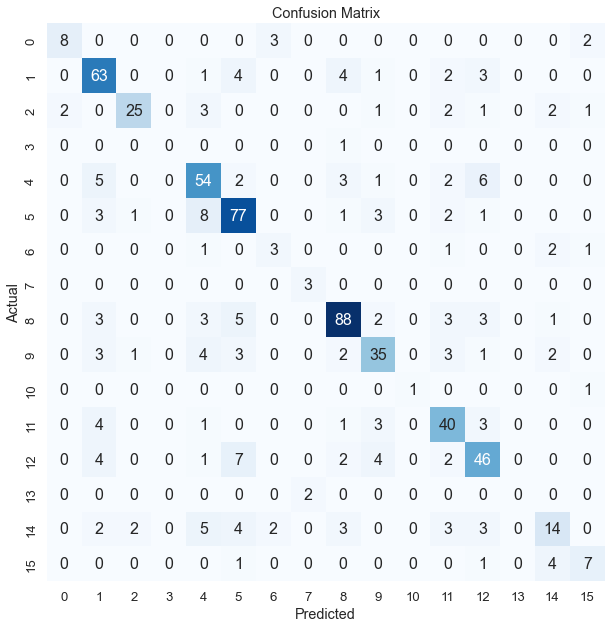

In [311]:
plt.figure(figsize=(10, 40))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Set font scale for labels
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            annot_kws={"size": 16}, cbar=False, square=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [1]:
final_df

NameError: name 'final_df' is not defined

In [86]:
team1_df = feature_column.iloc[:,0:24].mean()

In [92]:
team1_df.sort_values()

team1_Jersey                  0.000750
team1_Hong Kong               0.002625
team1_Bermuda                 0.004874
team1_Nepal                   0.005999
team1_Papua New Guinea        0.006749
team1_Namibia                 0.007874
team1_Oman                    0.007874
team1_Canada                  0.008624
team1_Kenya                   0.009749
team1_Netherlands             0.012373
team1_United Arab Emirates    0.014248
team1_Afghanistan             0.019873
team1_Scotland                0.022497
team1_Zimbabwe                0.032246
team1_Pakistan                0.049494
team1_Ireland                 0.053993
team1_South Africa            0.066367
team1_Sri Lanka               0.075741
team1_West Indies             0.076115
team1_Bangladesh              0.081365
team1_Australia               0.081365
team1_India                   0.106487
team1_New Zealand             0.123360
team1_England                 0.129359
dtype: float64

In [93]:
feature_column.drop(['team1_Jersey', 'team1_Hong Kong', 'team1_Bermuda', 'team1_Nepal', 'team1_Papua New Guinea'
                    , 'team1_Namibia', 'team1_Oman', 'team1_Canada', 'team1_Kenya'], axis=1, inplace = True)

In [94]:
feature_column.drop(['team2_Jersey', 'team2_Hong Kong', 'team2_Bermuda', 'team2_Nepal', 'team2_Papua New Guinea'
                    , 'team2_Namibia', 'team2_Oman', 'team2_Canada', 'team2_Kenya'], axis=1, inplace = True)

In [107]:
country = feature_column.iloc[:,30:66].mean()

In [109]:
country.sort_values()

played_in_Argentina                           0.000375
played_in_Papua New Guinea                    0.000750
played_in_Saint Vincent and the Grenadines    0.001125
played_in_Qatar                               0.001125
played_in_Hong Kong                           0.001125
played_in_Norfolk Island                      0.001500
played_in_Japan                               0.001500
played_in_Jamaica                             0.001500
played_in_Malaysia                            0.003000
played_in_Scotland                            0.005249
played_in_Oman                                0.005624
played_in_Kenya                               0.005624
played_in_Namibia                             0.006374
played_in_Netherlands                         0.007124
played_in_Cuba                                0.007499
played_in_Bolivia                             0.007499
played_in_Guyana                              0.007874
played_in_Nepal                               0.008249
played_in_

In [110]:
feature_column.drop(['played_in_Argentina', 'played_in_Papua New Guinea', 'played_in_Saint Vincent and the Grenadines',
                    'played_in_Qatar', 'played_in_Hong Kong', 'played_in_Norfolk Island', 'played_in_Japan',
                    'played_in_Jamaica', 'played_in_Malaysia', 'played_in_Oman', 'played_in_Kenya', 'played_in_Namibia'],
                   axis = 1, inplace = True)

In [114]:
feature_column.shape

(2667, 66)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(feature_column, target, test_size=0.30, random_state=42)

In [116]:
model_report = evaluate_models(X_train, y_train, X_test, y_test, models, params)

C:\Users\abi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\abi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' pena

In [121]:
model_report

{'LogisticRegression': {'test_model_accuracy': 0.6704119850187266,
  'parameter': {'C': 1, 'multi_class': 'ovr', 'penalty': 'l2'}},
 'DecisionTreeClassifier': {'test_model_accuracy': 0.6479400749063671,
  'parameter': {'criterion': 'entropy', 'splitter': 'best'}},
 'RandomForestClassifier': {'test_model_accuracy': 0.6754057428214731,
  'parameter': {'n_estimators': 128}},
 'SVC': {'test_model_accuracy': 0.6741573033707865,
  'parameter': {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}},
 'KNeighborsClassifier': {'test_model_accuracy': 0.5967540574282147,
  'parameter': {'metric': 'euclidean', 'n_neighbors': 10}},
 'GaussianNB': {'test_model_accuracy': 0.24968789013732834, 'parameter': {}}}

In [122]:
model_df = pd.DataFrame.from_dict(model_report, orient='index')

In [123]:
model_df.sort_values(by=['test_model_accuracy'], ascending = False, inplace = True)

In [124]:
best_model = model_df.head(1)

In [125]:
best_model

,test_model_accuracy,parameter
RandomForestClassifier,0.675406,{'n_estimators': 128}
